4.10.0


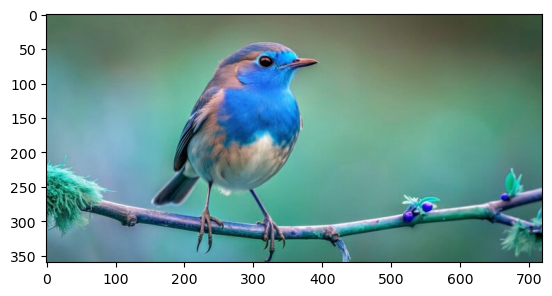

In [8]:
import cv2
print(cv2.__version__)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('img1.jpg')
# Display the image
plt.imshow(img)
plt.show()

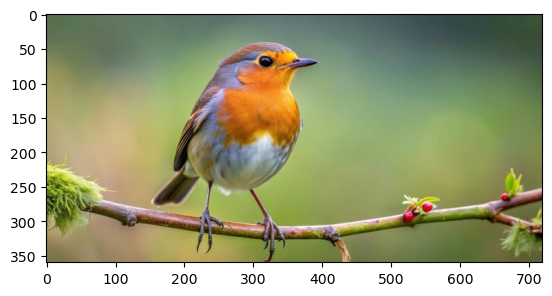

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

* 1. Modify brightness of the image performing appropriate operation
 

In [10]:

brightness_increase = 100
bright_image = cv2.convertScaleAbs(img, alpha=1, beta=brightness_increase)
plt.imshow(bright_image)
plt.title("bright_image")
plt.show()

* 2.modify the conrtrast of the image using various filter and compare their result
* 3.Remove noise from the image using linear filter

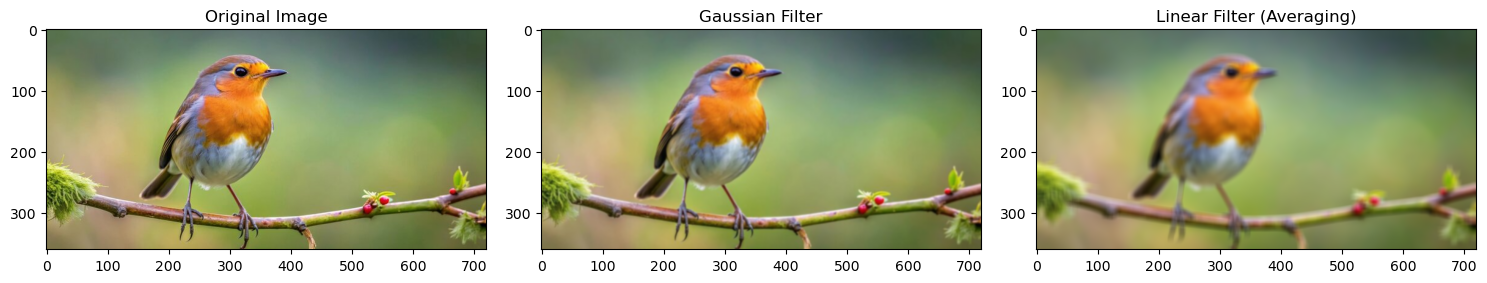

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# linear filter (Averaging)
kernel_size = 10
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
linear_filtered = cv2.filter2D(img, -1, kernel)

# Gaussian filter
sigma = 1.0
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), sigma)

# Plots
plt.figure(figsize=(15, 5))

plt.subplot(131), plt.imshow(img), plt.title('Original Image')
plt.subplot(133), plt.imshow(linear_filtered), plt.title('Linear Filter (Averaging)')
plt.subplot(132), plt.imshow(gaussian_filtered), plt.title('Gaussian Filter')

plt.tight_layout()
plt.show()


* 4. Remove noise from the image using non-linear filter
 

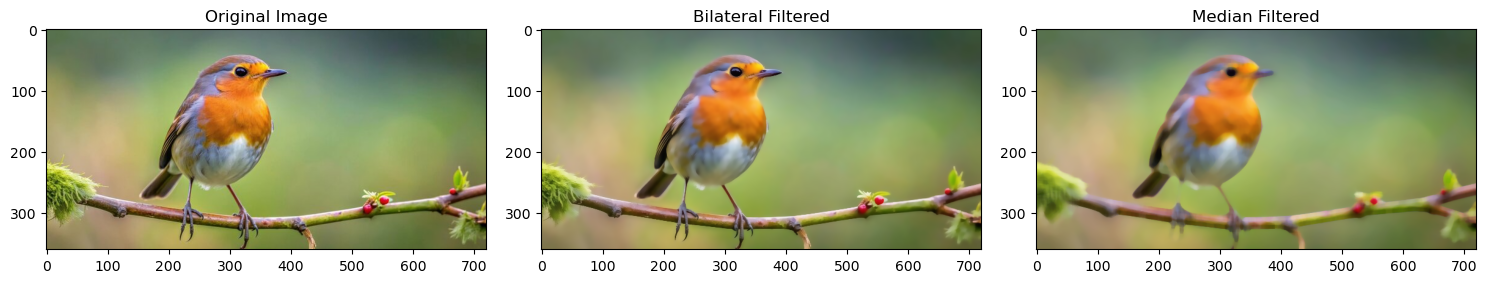

In [71]:
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Bilateral filtering
bilateral_filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Median Filter
median_filtered = cv2.medianBlur(img, 11) # Kernel size should be odd

# Results
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(bilateral_filtered, cmap='gray'), plt.title('Bilateral Filtered')
plt.subplot(133), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.tight_layout()
plt.show()


* 4. Identity the edge in the image using appropriate filter

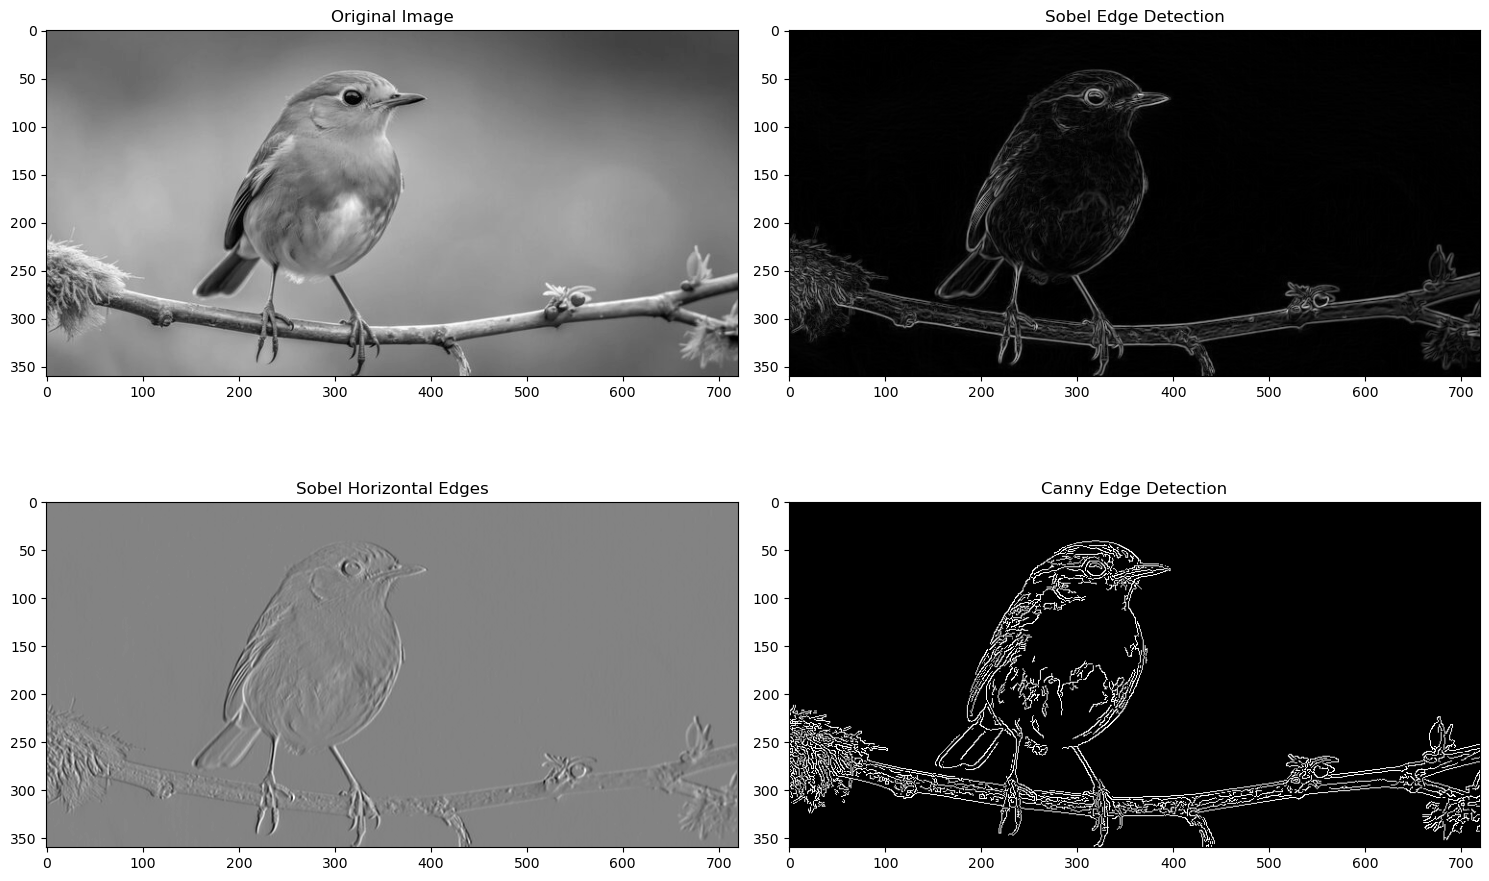

In [77]:
import cv2
import matplotlib.pyplot as plt

# Sobel Edge Detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_combined = cv2.magnitude(sobel_x, sobel_y)     # Combine both directions

# Canny Edge Detection
canny_edges = cv2.Canny(img, threshold1=50, threshold2=150)

# Plot the results
plt.figure(figsize=(15, 10))

plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Edge Detection')
plt.subplot(223), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel Horizontal Edges')
plt.subplot(224), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()


* Experiment with the low and high threshold parameters of the Canny algorithm to observe their effects on edge detection. 


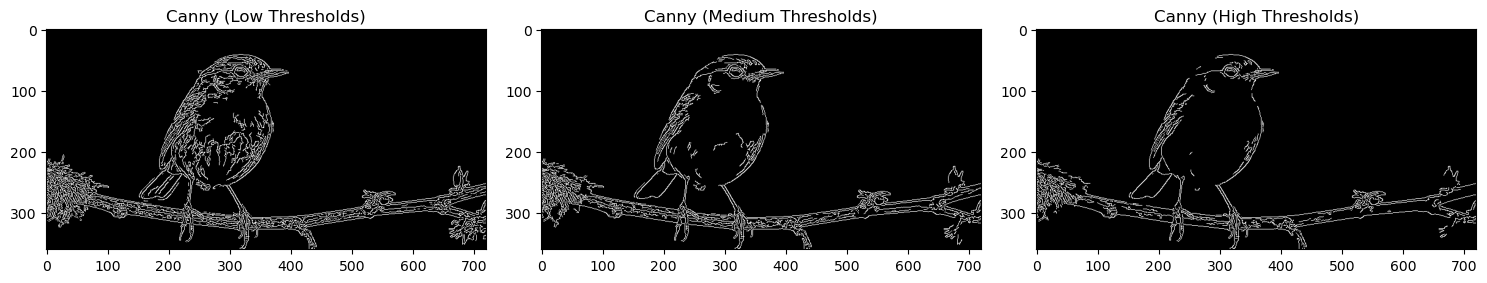

In [ ]:
import cv2
import matplotlib.pyplot as plt

canny_low = cv2.Canny(img, 50, 100)  # Low thresholds
canny_medium = cv2.Canny(img, 100, 200)  # Medium thresholds
canny_high = cv2.Canny(img, 150, 250)  # High thresholds

# Plot the results
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(canny_low, cmap='gray'), plt.title('Canny (Low Thresholds)')
plt.subplot(132), plt.imshow(canny_medium, cmap='gray'), plt.title('Canny (Medium Thresholds)')
plt.subplot(133), plt.imshow(canny_high, cmap='gray'), plt.title('Canny (High Thresholds)')
plt.tight_layout()
plt.show()


*  Compare the edges detected by Canny and Sobel methods on the same image. 

In [12]:
# Sobel Edge Detection and Canny Comparison

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_combined = cv2.magnitude(sobel_x, sobel_y)     # Combine both directions

canny_edges = cv2.Canny(img, 100, 200)

# Plot the results
plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Edge Detection')
plt.subplot(223), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel Horizontal Edges')
plt.subplot(224), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()
 


*  Write a program to compute second-order gradients using the Laplacian operator. 
 

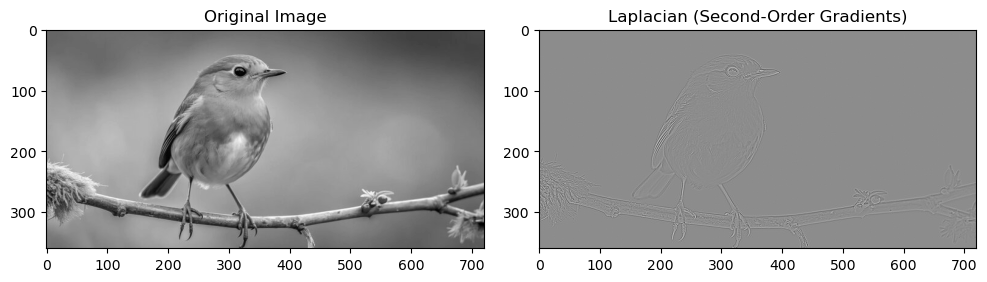

In [20]:
# Compute second-order gradients using Laplacian operator

laplacian = cv2.Laplacian(img, cv2.CV_64FC1)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian (Second-Order Gradients)')
plt.tight_layout()
plt.show()
 


*  Apply Gaussian blurring to an image and then compute edges using the Laplacian operator.
 

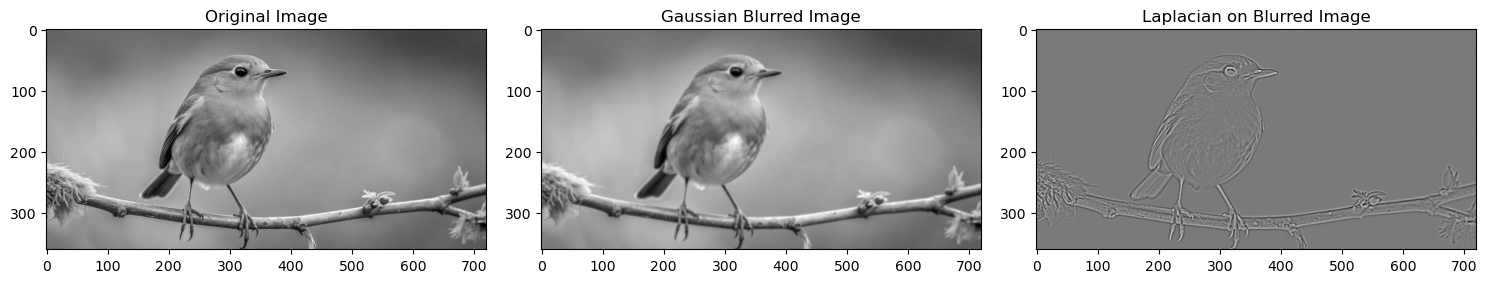

In [22]:
# Apply Gaussian blurring and compute edges using Laplacian operator
 
blurred_img = cv2.GaussianBlur(img, (5, 5), sigmaX=1.0)

laplacian_blurred = cv2.Laplacian(blurred_img, cv2.CV_64F)

# Plot the results
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(blurred_img, cmap='gray'), plt.title('Gaussian Blurred Image')
plt.subplot(133), plt.imshow(laplacian_blurred, cmap='gray'), plt.title('Laplacian on Blurred Image')
plt.tight_layout()
plt.show()
 


*  Apply Sobel, Canny, and LoG edge detection to the same image and display their outputs side by side. 
 

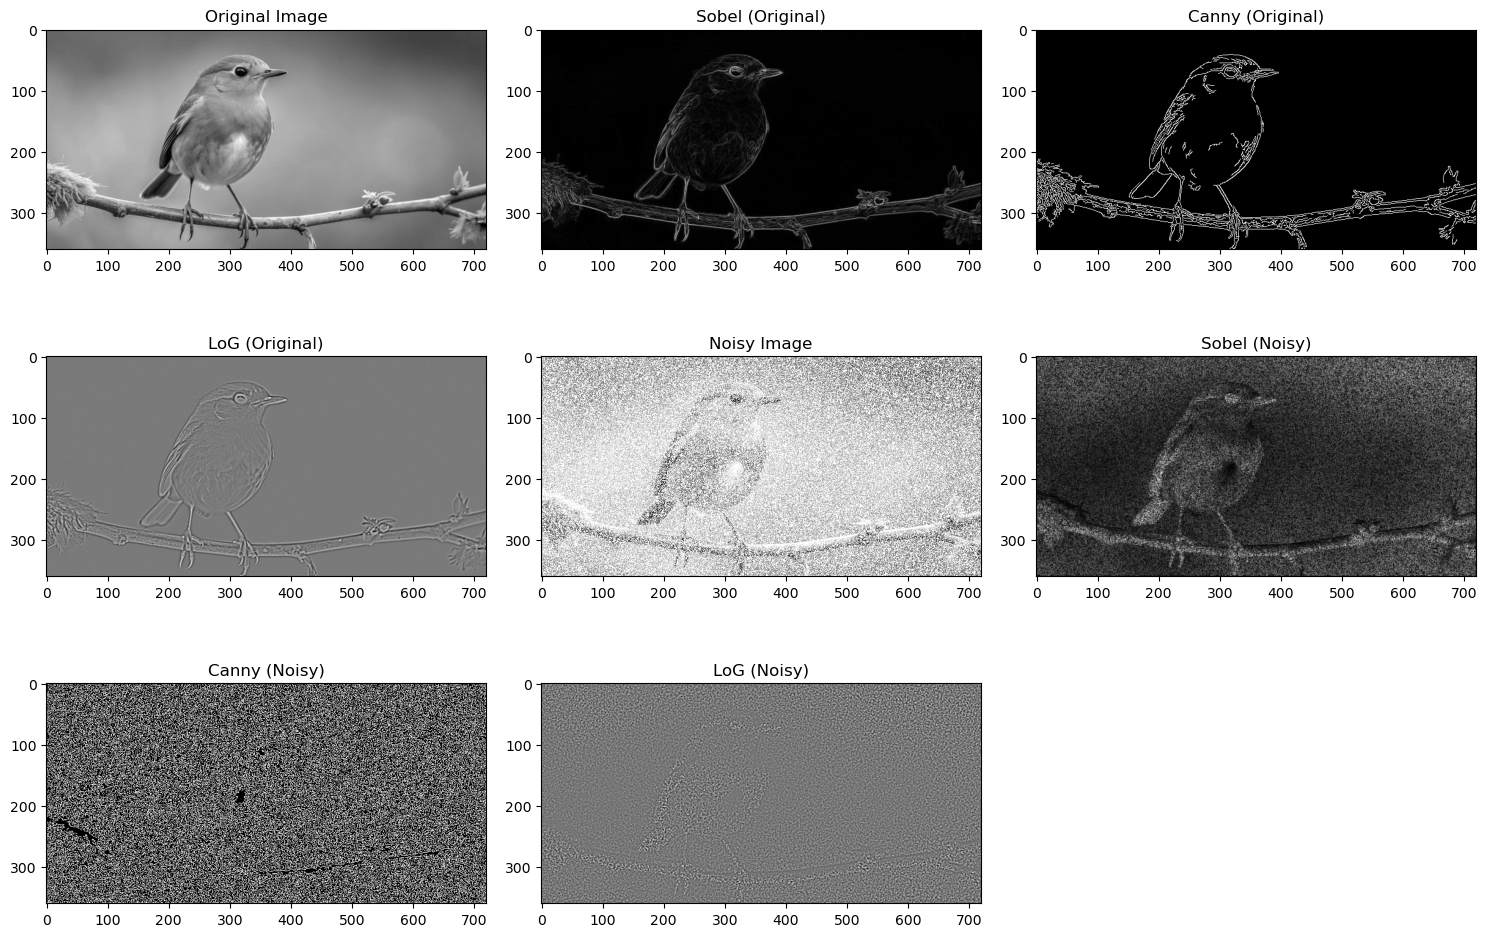

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError("Image not found. Please check the file path.")
    return img

# Add random noise to the image
def add_noise(img):
    noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
    noisy_img = cv2.add(img, noise)
    return noisy_img

# Apply Sobel, Canny, and LoG edge detection
def edge_detection(img):
    # Sobel Edge Detection
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    # Canny Edge Detection
    canny_edges = cv2.Canny(img, 100, 200)

    # Laplacian of Gaussian (LoG) Edge Detection
    blurred_img = cv2.GaussianBlur(img, (5, 5), sigmaX=1.0)
    log_edges = cv2.Laplacian(blurred_img, cv2.CV_64F)

    return sobel_combined, canny_edges, log_edges

# Plot results for original and noisy images
def plot_results(original_img, noisy_img):
    # Apply edge detection to original and noisy images
    sobel_original, canny_original, log_original = edge_detection(original_img)
    sobel_noisy, canny_noisy, log_noisy = edge_detection(noisy_img)

    # Plot results for original image
    plt.figure(figsize=(15, 10))
    plt.subplot(331), plt.imshow(original_img, cmap='gray'), plt.title('Original Image')
    plt.subplot(332), plt.imshow(sobel_original, cmap='gray'), plt.title('Sobel (Original)')
    plt.subplot(333), plt.imshow(canny_original, cmap='gray'), plt.title('Canny (Original)')
    plt.subplot(334), plt.imshow(log_original, cmap='gray'), plt.title('LoG (Original)')

    # Plot results for noisy image
    plt.subplot(335), plt.imshow(noisy_img, cmap='gray'), plt.title('Noisy Image')
    plt.subplot(336), plt.imshow(sobel_noisy, cmap='gray'), plt.title('Sobel (Noisy)')
    plt.subplot(337), plt.imshow(canny_noisy, cmap='gray'), plt.title('Canny (Noisy)')
    plt.subplot(338), plt.imshow(log_noisy, cmap='gray'), plt.title('LoG (Noisy)')

    plt.tight_layout()
    plt.show()

# Load the image and process it
image_path = 'img1.jpg'  # Replace with your image path
original_img = load_image(image_path)
noisy_img = add_noise(original_img)
plot_results(original_img, noisy_img)


*  Add random noise to an image and test edge detection using Sobel, Canny, and LoG.